# A3. Classification [86 pts]

The objective of the **Assignment 3** is to:
* Review classification models: Random Forest, Gradient Boosting Tree, SVM
* Perform feature selection using iterative methods and PCA

In [77]:
#Loveleen Kaur
#3138819
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


# Dataset

For this assignment, we will use the `Weekly S&P Stock Market Data`. This dataset contains the weekly percentage returns for the S&P 500 stock index between 1990 and 2010. The following is the description of the variables:

* Year: The year that the observation was recorded
* Lag1: Percentage return for previous week
* Lag2: Percentage return for 2 weeks previous
* Lag3: Percentage return for 3 weeks previous
* Lag4: Percentage return for 4 weeks previous
* Lag5: Percentage return for 5 weeks previous
* Volume: Volume of shares traded (average number of daily shares traded in billions)
* Today: Percentage return for this week
* Direction: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.

Source: Raw values of the S&P 500 were obtained from Yahoo Finance and then converted to percentages and lagged.

In [78]:
Weekly = pd.read_csv('Weekly.csv')
Weekly.shape

(1089, 9)

In [79]:
Weekly.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down


# Splitting data into training and set

For this assignment, we will train our models using data from 1990 to 2005. The validation set will include data from 2006 to 2009. Finally, the test set will include data corresponding to 2010.

The purpose will be to predict the variable `Direction`, which indicates if the SP&500 index went down or up that week. We will use the five lag variables plus volume as predictors.

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit

cols =Weekly.columns[1:-2]

X_train = Weekly.loc[ Weekly['Year'] < 2006 ][ cols ]
X_val = Weekly.loc[ ( Weekly['Year'] >= 2006) &  ( Weekly['Year'] < 2010) ][ cols ]
X_test = Weekly.loc[  Weekly['Year'] >= 2010][ cols ]

X_test_actual = Weekly.loc[  Weekly['Year'] >= 2010, 'Today' ]


y_train = Weekly.loc[ Weekly['Year'] < 2006 ]['Direction'].replace({'Down':0, 'Up':1})
y_val = Weekly.loc[ ( Weekly['Year'] >= 2006) &  ( Weekly['Year'] < 2010) ]['Direction'].replace({'Down':0, 'Up':1})
y_test = Weekly.loc[ Weekly['Year'] >= 2010 ]['Direction'].replace({'Down':0, 'Up':1})
    

print( X_train.shape, X_val.shape, X_test.shape )
print( y_train.shape, y_val.shape, y_test.shape )

(828, 6) (209, 6) (52, 6)
(828,) (209,) (52,)


In [81]:
X_train.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728


## Imbalanced dataset

Before going to the training stage, let's check how is the distribution of the classes in the training set.

In [82]:
y_train.value_counts()/len(y_train)

Direction
1    0.559179
0    0.440821
Name: count, dtype: float64

Class 1 (Up) overpasses the number of samples with class 0. This imbalance between classes can affect the training of our models. To overcome this, we can use the oversampling technique, sampling with the replacement of the minority class, so that both of them have a similar proportion. To read more, please check this: https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

In Python, we can use the class SMOTE from the imblearn.over_sampling library for such purpose.   https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [83]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42  )

# Apply SMOTE to the dataset
X_train_over, y_train = smote.fit_resample( X_train, y_train )

#ros = RandomOverSampler(random_state=42)
#X_train_over, y_train = ros.fit_resample( X_train, y_train )

If we check again the proportion, now we see that they have similar proportion.

In [84]:
y_train.value_counts()/len(y_train)

Direction
0    0.5
1    0.5
Name: count, dtype: float64

## Normalizing features

Finally, we normalize the features using the StandardScaler.

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_over)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



# Visualizing using PCA

The current dataset has a total of six features, which makes challenging to visualize.

So, we will use PCA to reduce dimensionality into two PCA.

**[5 pts]** Apply PCA to the `X_train_scaled` to find the principal components. You can use the in-built PCA library.

In [86]:
from sklearn.decomposition import PCA


# TO DO
#Since we want to select 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print(X_train_pca.shape)

#printing the PCA components
print(pca.components_)
print(pca.components_.T[:,0])
print(pca.components_.T[:,1])




(926, 2)
[[ 0.25188591 -0.54334151  0.53444964 -0.52703079  0.24075408  0.14132621]
 [-0.30619994 -0.29498325 -0.32761801 -0.10013112 -0.29710808  0.78332207]]
[ 0.25188591 -0.54334151  0.53444964 -0.52703079  0.24075408  0.14132621]
[-0.30619994 -0.29498325 -0.32761801 -0.10013112 -0.29710808  0.78332207]


**[5 pts]** Make a scatter plot, locating the principal component on the x-axis and the second component on the y-axis. For the *Down* samples, use 'v' as a marker and 'r' as a color. For the *Up* samples, use '^' as a marker and 'g' as a color.

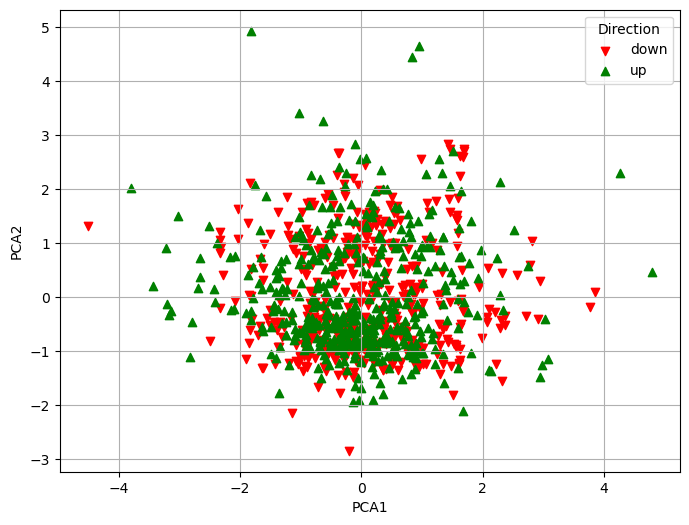

In [87]:
# TO DO



plt.figure(figsize=(8, 6))  # Adjust the figure size as needed



# Plotting the scatter plot


# Plotting points with y_train as 0 for "down" as red triangles pointing down
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], c='red', marker='v', label='down')


# Plotting points with y_train as 1 for "up" as green triangles pointing up
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], c='green', marker='^', label='up')

plt.grid()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title="Direction")



plt.show()

**[4 pts]** Calculate how many components are need to keep at least 80% of the data.

In [88]:
#TO DO
#Since we want to capture at least 80% of the data
pca2 = PCA(n_components = 0.8)
#fitting the scaled data
reduced = pca2.fit_transform(X_train_scaled)
#reduced = pca2.transform(X_train_scaled)

print(reduced.shape)

(926, 5)


You do NOT have to do the plot below. You need to find the number of components using Python instructions. You can check your answer with the plot.

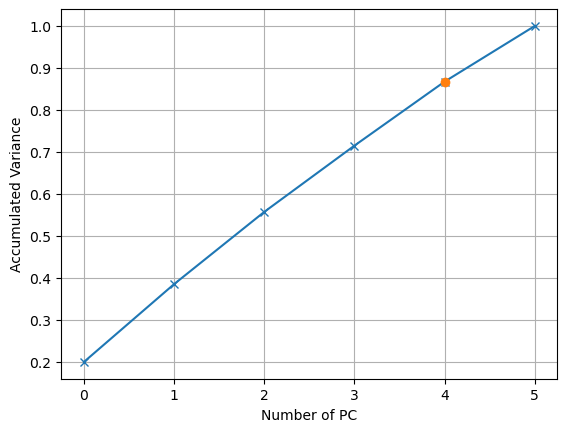

**[4 pts]** Train a Logistic regression using the number of components identified in the previous question. Test the model into the test set. To transform the test set use: `X_test_pca = pca.transform( X_test_scaled )`, where pca is the PCA object you fit into the training data.



In [89]:
from sklearn.linear_model import LogisticRegression

# TO DO
#transforming the test set first
X_test_pca = pca2.transform( X_test_scaled )

#fitting the logistic regression model
clf = LogisticRegression(random_state=0).fit(reduced, y_train)
#using the model to predict the test set
pred = clf.predict(X_test_pca)

In [90]:
confusion_matrix( y_test, pred )

array([[12,  8],
       [19, 13]])

# Selecting features backward search

[**8 pts**] As we saw in class, we can also select features using an iterative procedure. The code below performs feature selection using a backward search. Complete the missing parts.

As a metric we will use G-mean. This metric is defined as:
$$G-mean = \sqrt{ TPR \times TNR }, $$ where TPR is the true positive rate (percentage of samples from the positive class predicted correctly), and TNR is the true positive rate (percentage of samples from the negative class predicted correctly)

In [91]:
from sklearn.metrics import f1_score

#Total number of features. Initially it will contain six values: [0 1 2 3 4 5 ], each representing a feature
features = np.arange( X_train_scaled.shape[1] ).tolist()
selected = []

stop = False

#First we train a logistic regression, using all the features
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train )

pred = clf.predict( X_val_scaled )

# TO DO 
# Calculate the g-mean
cm = confusion_matrix( y_val, pred ) 
cm = cm/np.sum( cm, axis=1)[:,np.newaxis]
gmean = np.sqrt( cm[0,0]*cm[1,1] )

prevGmean = gmean

while not stop:
    
    # Array to store gmean obtained by removing each feature
    gmean_values = np.empty( len(features) ) 
    

    for idxF in range( len( features ) ):
        
        #getting current feature
        currentF = features[idxF ]
        
        # making a copy of the still features
        remainingFeat = features.copy()
        # remove the current feature
        remainingFeat.remove( currentF )
        
        # TO DO 
        # Train logistic regression using the X_train_scaled[:, remainingFeat]
        clf = LogisticRegression()
        clf.fit(X_train_scaled[:, remainingFeat], y_train )
        
        
        # Calculate Gmean using  X_val_scaled[: ,remainingFeat ] 
        pred = clf.predict(X_val_scaled[: ,remainingFeat ] )
        cm = confusion_matrix( y_val, pred ) 
        cm = cm/np.sum( cm, axis=1)[:,np.newaxis]
        gmean = np.sqrt( cm[0,0]*cm[1,1] )
        
        
        gmean_values[ idxF ] = gmean 
        
        print( cols[ remainingFeat],  gmean_values[ idxF ] )
        idxF += 1 
        
    idxMin = np.argmax( gmean_values ) 
    dropFeat = features[ idxMin ] 
    
    # TO DO
    # write the condition that check if the feature can be dropped
    if(gmean_values[idxMin] >= prevGmean ):
        prevGmean = gmean_values[ idxMin ]
        features.remove( dropFeat )
    else:
        stop = True
    
    print( dropFeat,  gmean_values[ idxMin ] )
        
        
print( cols[ features] )

Index(['Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object') 0.4498749953914093
Index(['Lag1', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object') 0.30424000964875475
Index(['Lag1', 'Lag2', 'Lag4', 'Lag5', 'Volume'], dtype='object') 0.46205911157505775
Index(['Lag1', 'Lag2', 'Lag3', 'Lag5', 'Volume'], dtype='object') 0.4449492083146097
Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Volume'], dtype='object') 0.39521936580516653
Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5'], dtype='object') 0.5222329678670935
5 0.5222329678670935
Index(['Lag2', 'Lag3', 'Lag4', 'Lag5'], dtype='object') 0.4839005885657973
Index(['Lag1', 'Lag3', 'Lag4', 'Lag5'], dtype='object') 0.5020618644176028
Index(['Lag1', 'Lag2', 'Lag4', 'Lag5'], dtype='object') 0.5126498974498794
Index(['Lag1', 'Lag2', 'Lag3', 'Lag5'], dtype='object') 0.4883397032275719
Index(['Lag1', 'Lag2', 'Lag3', 'Lag4'], dtype='object') 0.5366289362709977
4 0.5366289362709977
Index(['Lag2', 'Lag3', 'Lag4'], dtype='object') 0.5126498974498794
Index

**[4 pts]** Using the best identified features, train a logisitc regression and evaluate on the test set

In [92]:

# TO DO  
#training another Logistic Regression
clf = LogisticRegression()
#fitting the training set with the best identified features
clf.fit(X_train_scaled[:,features], y_train )
#predicting on the test set
pred = clf.predict(X_test_scaled[: ,features ] )
#calculating a confusion matrix
confusion_matrix( y_test, pred ) 


array([[12,  8],
       [13, 19]])

# Visualizing importance using a Random Forest

We can also analyze which are the relevant features by training a random forest and then checking the feature relevance.  

**[5 pts]** Train a Random Forest using the default parameters. Then make a bar plot of the feature importance.

In [93]:
cols =Weekly.columns[1:-2]
print(cols)

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')


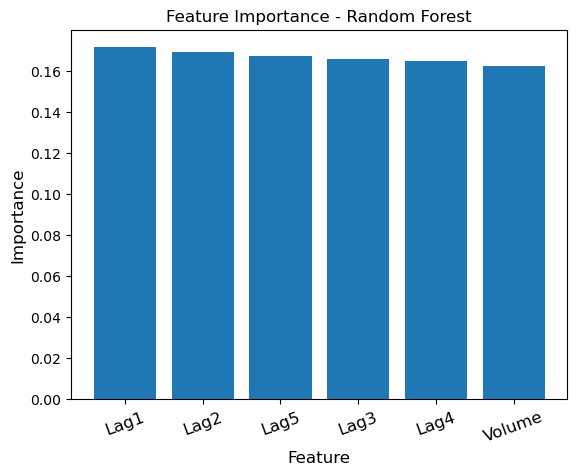

In [94]:
from sklearn.ensemble import RandomForestClassifier

# TO DO
clf=RandomForestClassifier(random_state = 0)

clf.fit(X_train_scaled, y_train)

# Calculate feature importances
importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


# Rearrange feature names so they match the sorted feature importances

names = [cols[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X_train_scaled.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train_scaled.shape[1]), names, rotation=20, fontsize = 12)

# Create plot title
plt.title("Feature Importance - Random Forest")
plt.xlabel('Feature',fontsize = 12)
plt.ylabel('Importance',fontsize = 12)
# Show plot
plt.show()



   # Comparison Analysis

Now, we want to train three different classifiers:
- Random Forest
- Gradient Boosting Tree
- SVM

For each classifiers, we will tune the hyperparameters.

### Random Forest

**[8 pts]** Complete the hyperparameter tuning for the Random forest. 

For reproducibility, please include the set `random_state =0` inside the random forest object.

Use Gmean as the metric factor to compare the hyperparameter configurations.

You need to fit the model on the training data and evaluate the validation set.

In [95]:
from itertools import product


# Define the parameter space
space = {
    'n_estimators': [ 50, 80, 100, 300  ],
    'max_depth': [1, 2, 3, 4, 5 ],
    'min_samples_leaf': [ 5, 7,  10],
    'max_features': [.3, .4, .5 ]
}

# 'n_estimators': [25, 50, 100, 150], 
#     'max_features': ['sqrt', 'log2', None], 
#     'max_depth': [3, 6, 9], 
#     'max_leaf_nodes': [3, 6, 9], 
        

# Compute the Cartesian product
cartesian_product = list(product(*space.values()))

maxScore = 0
bestCombination_rf = None
rf = None 

# Print the Cartesian product
for combination in cartesian_product:        
    n_estimators = combination[0]
    max_depth = combination[1]
    min_samples_leaf = combination[2]
    max_features = combination[3]
    
    
    # TO DO 
    #1. Define a random forest
    model_grid = RandomForestClassifier(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=max_features,random_state = 0)

   
    #2. Fit using X_train_scaled, y_train
    model_grid.fit(X_train_scaled, y_train)
    
    #3. predict on X_val_scaled
    pred = model_grid.predict(X_val_scaled)
    
    #4. calculate gmean
    cm = confusion_matrix( y_val, pred ) 
    cm = cm/np.sum( cm, axis=1)[:,np.newaxis]
    gmean = np.sqrt( cm[0,0]*cm[1,1] )
    
    # 5. update best combionation if needed
    if (gmean >= maxScore) :
        maxScore = gmean
        bestCombination_rf = combination
        print( 'hyperparameters:{}, gmean :{}'.format(combination, gmean ))
        print( cm )
        
        

        
    
print('best combination for randome forest')
print( bestCombination_rf )
    

hyperparameters:(50, 1, 5, 0.3), gmean :0.4889974000956196
[[0.42424242 0.57575758]
 [0.43636364 0.56363636]]
hyperparameters:(50, 1, 5, 0.4), gmean :0.49236596391733095
[[0.48484848 0.51515152]
 [0.5        0.5       ]]
hyperparameters:(50, 1, 5, 0.5), gmean :0.49478455301541396
[[0.43434343 0.56565657]
 [0.43636364 0.56363636]]
hyperparameters:(50, 1, 7, 0.5), gmean :0.49478455301541396
[[0.43434343 0.56565657]
 [0.43636364 0.56363636]]
hyperparameters:(50, 1, 10, 0.3), gmean :0.5005047956863655
[[0.44444444 0.55555556]
 [0.43636364 0.56363636]]
hyperparameters:(100, 1, 5, 0.4), gmean :0.5019704058387553
[[0.49494949 0.50505051]
 [0.49090909 0.50909091]]
best combination for randome forest
(100, 1, 5, 0.4)


**[4 pts]** Use the best parameters to fit the final model. Then, check the accuracy of the test set.

Please store the prediction of the test set into a variable called `pred_rf`.

For reproducibility, please include the set `random_state =0` inside the random forest object.

Print the confusion matrix (cm)

In [96]:
from sklearn.metrics import accuracy_score

n_estimators = bestCombination_rf[0]
max_depth = bestCombination_rf[1]
min_samples_leaf = bestCombination_rf[2]
max_features = bestCombination_rf[3]


# TO DO
#fitting the final model using the best parameters
final_model = RandomForestClassifier(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=max_features,random_state = 0)

#fitting the training set
final_model.fit(X_train_scaled, y_train)

pred_rf = final_model.predict(X_test_scaled)
#acc = accuracy_score(y_test, pred_rf)
#print(acc)
cm = confusion_matrix( y_test, pred_rf ) 
cm = cm/np.sum( cm, axis=1)[:,np.newaxis]
print( cm )

[[0.65    0.35   ]
 [0.46875 0.53125]]


### Gradient Boosting Tree

**[8 pts]** Complete the hyperparameter tuning for the Gradient Boosting Tree. 

For reproducibility, please include the set `random_state =0` inside the gradient boositing tree object.

Use Gmean as the metric factor to compare the hyperparameter configurations.

You need to fit the model on the training data and evaluate the validation set.

In [97]:
from sklearn.ensemble import GradientBoostingClassifier


# Define the parameter space
space = dict()
space['n_estimators'] = [10, 15, 20 ]
space['max_depth'] = [1, 2, 3, 4, 5 ]
space['min_samples_leaf'] =   [ 5, 10, 20 ]
space['max_features'] = [.2,.3,.4,.5]
space['learning_rate'] = [ .1, .5, 1 ]



# Compute the Cartesian product
cartesian_product = list(product(*space.values()))

maxScore = 0
bestCombination_gb = None
rf = None 
# Print the Cartesian product
for combination in cartesian_product:
    
    
    n_estimators = combination[0]
    max_depth = combination[1]
    min_samples_leaf = combination[2]
    max_features = combination[3]
    learning_rate  = combination[4]
    
      # TO DO 
    #1. Define a gradient boosting 
    model_gbt = GradientBoostingClassifier(n_estimators = n_estimators,max_depth= max_depth,
                                       min_samples_leaf=min_samples_leaf,max_features=max_features,
                                       learning_rate =learning_rate,random_state =0)
   
    #2. Fit using X_train_scaled, y_train
    model_gbt.fit(X_train_scaled, y_train)
    
    #3. predict on X_val_scaled
    pred = model_gbt.predict(X_val_scaled)
    
    #4. calculate gmean
    cm = confusion_matrix( y_val, pred ) 
    cm = cm/np.sum( cm, axis=1)[:,np.newaxis]
    gmean = np.sqrt( cm[0,0]*cm[1,1] )
    
    # 5. update best combionation if needed
    
    
    
    if (gmean >= maxScore) :
        maxScore = gmean
        bestCombination_gb = combination
        print( 'hyperparameters:{}, gmean :{}'.format(combination, gmean ))
        print( cm )
        
        

    
print('best combination for randome forest')
print( bestCombination_gb )

hyperparameters:(10, 1, 5, 0.2, 0.1), gmean :0.4146092454905956
[[0.78787879 0.21212121]
 [0.78181818 0.21818182]]
hyperparameters:(10, 1, 5, 0.2, 0.5), gmean :0.5022447316115806
[[0.41414141 0.58585859]
 [0.39090909 0.60909091]]
hyperparameters:(10, 1, 5, 0.2, 1), gmean :0.5255632336649405
[[0.47474747 0.52525253]
 [0.41818182 0.58181818]]
hyperparameters:(10, 1, 5, 0.3, 1), gmean :0.5255632336649405
[[0.47474747 0.52525253]
 [0.41818182 0.58181818]]
hyperparameters:(10, 1, 10, 0.2, 1), gmean :0.5581025179743679
[[0.53535354 0.46464646]
 [0.41818182 0.58181818]]
hyperparameters:(10, 1, 10, 0.3, 1), gmean :0.5581025179743679
[[0.53535354 0.46464646]
 [0.41818182 0.58181818]]
hyperparameters:(10, 1, 20, 0.2, 0.5), gmean :0.5652957001872009
[[0.58585859 0.41414141]
 [0.45454545 0.54545455]]
hyperparameters:(10, 1, 20, 0.3, 0.5), gmean :0.5652957001872009
[[0.58585859 0.41414141]
 [0.45454545 0.54545455]]
best combination for randome forest
(10, 1, 20, 0.3, 0.5)


**[4 pts]** Use the best parameters to fit the final model. Then, check the accuracy of the test set.

Please store the prediction of the test set into a variable called `pred_gb`.

For reproducibility, please include the set `random_state =0` inside the gradient boositing tree object.

Print the confusion matrix

In [98]:
n_estimators = bestCombination_gb[0]
max_depth = bestCombination_gb[1]
min_samples_leaf = bestCombination_gb[2]
max_features = bestCombination_gb[3]
learning_rate  = bestCombination_gb[4]
    
# TO DO
#fitting the final gradient boosting model using the best parameters
final_model = GradientBoostingClassifier(n_estimators = n_estimators,max_depth= max_depth,
                                       min_samples_leaf=min_samples_leaf,max_features=max_features,
                                       learning_rate =learning_rate,random_state =0)



#fitting the training set
final_model.fit(X_train_scaled, y_train)

#predicting on the test set
pred_gb = final_model.predict(X_test_scaled)

#calculating the confusion matrix
cm = confusion_matrix( y_test, pred_gb ) 
cm = cm/np.sum( cm, axis=1)[:,np.newaxis]

print( cm )

[[0.75  0.25 ]
 [0.375 0.625]]


# SVM

**[8 pts]** Complete the hyperparameter tuning for the SVM. 

Use Gmean as the metric factor to compare the hyperparameter configurations.

You need to fit the model on the training data and evaluate the validation set.

In [99]:
from sklearn.svm import SVC

space = dict()
space['kernel'] = ['rbf', 'sigmoid' , 'poly' ]
space['C'] =   [0.1,1 ]
space['gamma'] =  [.001, .01, .1 ] 
space['degree'] = [1, 2, 3, 4, 5, 6] 
space['coef0'] = [  2.0, 3.0 ]

# Compute the Cartesian product
cartesian_product = list(product(*space.values()))

maxScore = 0
bestCombination = None

# Print the Cartesian product
for combination in cartesian_product:
    

    kernel = combination[0]
    C = combination[1]
    gamma = combination[2]
    degree = combination[3]
    coef0 = combination[4]
    
      # TO DO 
    #1. Define a SVC 
    model_SVC = SVC(kernel = kernel,C = C,gamma = gamma,degree = degree,coef0 = coef0)

    #2. Fit using X_train_scaled, y_train
    model_SVC.fit(X_train_scaled, y_train)
    
    #3. predict on X_val_scaled
    pred = model_SVC.predict(X_val_scaled)
    
    #4. calculate gmean
    cm = confusion_matrix( y_val, pred ) 
    cm = cm/np.sum( cm, axis=1)[:,np.newaxis]
    gmean = np.sqrt( cm[0,0]*cm[1,1] )
    
    # 5. update best combionation if needed
    
    if (gmean >= maxScore) :
        maxScore = gmean
        bestCombination_svm = combination
        print( 'hyperparameters:{}, gmean :{}'.format(combination, gmean  ))
        print( cm )
        
        

    
print('best combination for randome forest')
print( bestCombination_svm )



hyperparameters:('rbf', 0.1, 0.001, 1, 2.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 0.1, 0.001, 1, 3.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 0.1, 0.001, 2, 2.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 0.1, 0.001, 2, 3.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 0.1, 0.001, 3, 2.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 0.1, 0.001, 3, 3.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 0.1, 0.001, 4, 2.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 0.1, 0.001, 4, 3.0), gmean :0.3969581307590986
[[0.78787879 0.21212121]
 [0.8        0.2       ]]
hyperparameters:('rbf', 

**[4 pts]** Use the best parameters to fit the final model. Then, check the accuracy of the test set.

Please store the prediction of the test set into a variable called `pred_svm`.

Print confusion matrix
   

In [100]:
kernel = bestCombination_svm[0]
C = bestCombination_svm[1]
gamma = bestCombination_svm[2]
degree = bestCombination_svm[3]
coef0 = bestCombination_svm[4]

# TO DO
#fitting the final SVM model using the best parameters
final_model = SVC(kernel = kernel,C = C,gamma = gamma,degree = degree,coef0 = coef0)


#fitting the training set
final_model.fit(X_train_scaled, y_train)

#predicting on the test set
pred_svm = final_model.predict(X_test_scaled)

#calculating the confusion matrix
cm = confusion_matrix( y_test, pred_svm ) 
cm = cm/np.sum( cm, axis=1)[:,np.newaxis]

print( cm )

[[0.65    0.35   ]
 [0.65625 0.34375]]


**[5 pts]** Based on your results, complete the following table

| Model | Downward Accuracy (%) | Upward Accuracy (%) | G-Mean (%) |
|-------|-----------------------|---------------------|------------|
| RF    |      *replace*    |    *replace*    | *replace* |
| GB    |      *replace*    |    *replace*    | *replace* |
| SVM   |      *replace*    |    *replace*    | *replace* |

Provide interpretation of the results.

# Checking Stock performance

In addition to the model accuracy, we can compare the models to evaluate which could obtain a better return.

The variable `X_test_actual` contains the actual return. To evaluate the models, let's use a simple investment strategy. We would buy when the model output is 1, and we do not buy otherwise.

**[4 pts]** Calculate the return of each classifier by multiplying the prediction made for each classifier with the `X_test_actual` vector.

In [25]:
# TO DO
return_rf =  
return_gb =  
return_svm =  

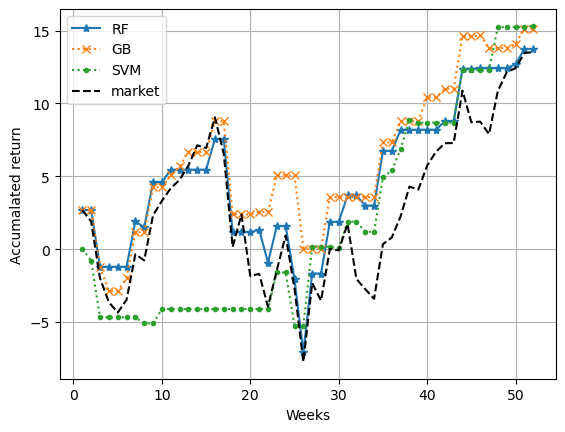

In [26]:
weeks = np.arange(1,53)


plt.figure()
plt.plot( weeks, np.cumsum(  return_rf), '*-', label = 'RF')
plt.plot( weeks, np.cumsum( return_gb ), 'x:', label = 'GB')
plt.plot( weeks, np.cumsum(  return_svm), ':.', label = 'SVM')
plt.plot( weeks, np.cumsum(  X_test_actual ), 'k--', label = 'market')
plt.xlabel('Weeks')
plt.ylabel('Accumalated return')
plt.grid()
plt.legend()



Complete the table, providing the accumlated interest obtain at the 52th week of 2010.

| Model | Accumulated interest (%)  |
|-------|-----------------------|
| RF    |      *replace*     |
| GB    |      *replace*    |
| SVM   |      *replace*     |

[**6pts]** Provide interpretation. Which model was the best one? Based on the predictive performance, what could be the reason that that model performs better than the others? Did the model perform better than just buying shares of the index fund every week (black dotted line)?